# 📝 Exercise M4.04

In the previous notebook, we saw the effect of applying some regularization
on the coefficient of a linear model.

In this exercise, we will study the advantage of using some regularization
when dealing with correlated features.

We will first create a regression dataset. This dataset will contain 2,000
samples and 5 features from which only 2 features will be informative.

In [1]:
from sklearn.datasets import make_regression

In [2]:
data, target, coef = make_regression(
    n_samples=2_000, n_features=5, n_informative=2, shuffle=False,
    coef=True, random_state=0, noise=30,
)

When creating the dataset, `make_regression` returns the true coefficient
used to generate the dataset. Let's plot this information.

In [3]:
import pandas as pd

Features 0     9.566665
Features 1    40.192077
Features 2     0.000000
Features 3     0.000000
Features 4     0.000000
dtype: float64

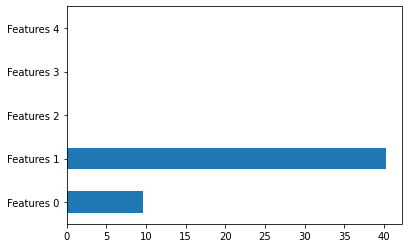

In [4]:
feature_names = [f"Features {i}" for i in range(data.shape[1])]
coef = pd.Series(coef, index=feature_names)
coef.plot.barh()
coef

Create a `LinearRegression` regressor and fit on the entire dataset and
check the value of the coefficients. Are the coefficients of the linear
regressor close to the coefficients used to generate the dataset?

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
linear_regression = LinearRegression()
linear_regression.fit(data, target)
linear_regression.coef_

array([10.89587004, 40.41128042, -0.20542454, -0.18954462,  0.11129768])

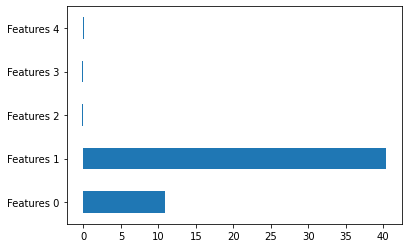

In [7]:
feature_names = [f"Features {i}" for i in range(data.shape[1])]
coef = pd.Series(linear_regression.coef_, index=feature_names)
_ = coef.plot.barh()

We see that the coefficients are close to the coefficients used to generate
the dataset. The dispersion is indeed cause by the noise injected during the
dataset generation.

Now, create a new dataset that will be the same as data with 4 additional columns that will repeat twice features 0 and 1. This procedure will create perfectly correlated features.

In [8]:
import numpy as np

In [9]:
data = np.concatenate([data, data[:, [0, 1]], data[:, [0, 1]]], axis=1)

Fit again the linear regressor on this new dataset and check the coefficients. What do you observe?

In [10]:
linear_regression = LinearRegression()
linear_regression.fit(data, target)
linear_regression.coef_

array([ 3.63195668, 13.47042681, -0.20542454, -0.18954462,  0.11129768,
        3.63195668, 13.47042681,  3.63195668, 13.47042681])

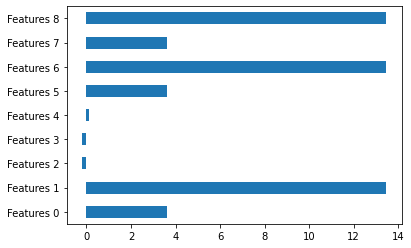

In [11]:
feature_names = [f"Features {i}" for i in range(data.shape[1])]
coef = pd.Series(linear_regression.coef_, index=feature_names)
_ = coef.plot.barh()

We see that the coefficient values are far from what one could expect. By repeating the informative features, one would have expected these coefficients to be similarly informative.

Instead, we see that some coefficients have a huge norm ~1e14. It indeed means that we try to solve an mathematical ill-posed problem. Indeed, finding coefficients in a linear regression involves inverting the matrix np.dot(data.T, data) which is not possible (or lead to high numerical errors).

Create a ridge regressor and fit on the same dataset. Check the coefficients. What do you observe?

In [12]:
from sklearn.linear_model import Ridge

In [13]:
ridge = Ridge()
ridge.fit(data, target)
ridge.coef_

array([ 3.6313933 , 13.46802113, -0.20549345, -0.18929961,  0.11117205,
        3.6313933 , 13.46802113,  3.6313933 , 13.46802113])

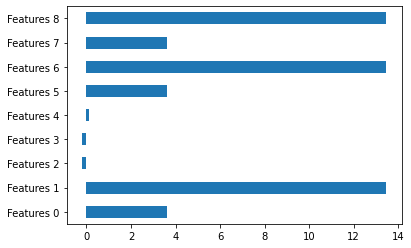

In [14]:
coef = pd.Series(ridge.coef_, index=feature_names)
_ = coef.plot.barh()

We see that the penalty applied on the weights give a better results: the values of the coefficients do not suffer from numerical issues. Indeed, the matrix to be inverted internally is np.dot(data.T, data) + alpha * I. Adding this penalty alpha allow the inversion without numerical issue.

Can you find the relationship between the ridge coefficients and the original coefficients?

In [15]:
ridge.coef_[:5] * 3

array([10.89417991, 40.40406338, -0.61648035, -0.56789883,  0.33351616])

Repeating three times each informative features induced to divide the ridge coefficients by three.

### Tip

We always advise to use l2-penalized model instead of non-penalized model in practice. In scikit-learn, LogisticRegression applies such penalty by default. However, one needs to use Ridge (and even RidgeCV to tune the parameter alpha) instead of LinearRegression.